<a href="https://colab.research.google.com/gist/shadab-entrepreneur/ae4be3dc7d4b081b61e15ba7d35216ad/tensorflow-for-beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [Medium](https://techwithshadab.medium.com/build-your-first-machine-learning-model-using-tensorflow-d61b9b2b7d5e)
- [Gist](https://gist.github.com/techwithshadab/ae4be3dc7d4b081b61e15ba7d35216ad)

## Step 1: Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.<br>
Also Import matplotlib.pyplot for creating visual plots

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Step 2: Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this Codelab is to create a model that can give the tnumber of new subscribers gained when given the amount x is spent in marketing, we create two lists `mar_budget` and `subs_gained` that we can use to train our model.

### 2*i+40

### Machine Learning terminology

- **Feature** — The input(s) to our model. In this case, a single value — the marketing Budget.

- **Labels** — The output our model predicts. In this case, a single value — the number of new subscribers gained.

- **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `mar_budget` and `new_subs_gained` at a specific index, such as `(80,200)` at index 1 below.

In [3]:
mar_budget    = np.array([60, 80,  100  , 30, 50, 20, 90,  10],  dtype=float)
subs_gained = np.array([160, 200, 240, 100, 140, 80, 220, 60],  dtype=float)

for i,c in enumerate(mar_budget):
  print("{} Market budget = {} new subscribers gained".format(c, subs_gained[i]))

60.0 Market budget = 160.0 new subscribers gained
80.0 Market budget = 200.0 new subscribers gained
100.0 Market budget = 240.0 new subscribers gained
30.0 Market budget = 100.0 new subscribers gained
50.0 Market budget = 140.0 new subscribers gained
20.0 Market budget = 80.0 new subscribers gained
90.0 Market budget = 220.0 new subscribers gained
10.0 Market budget = 60.0 new subscribers gained


**Let's plot all data that we have to visualise the relationship between Marketing Budget and Subscriptions:**

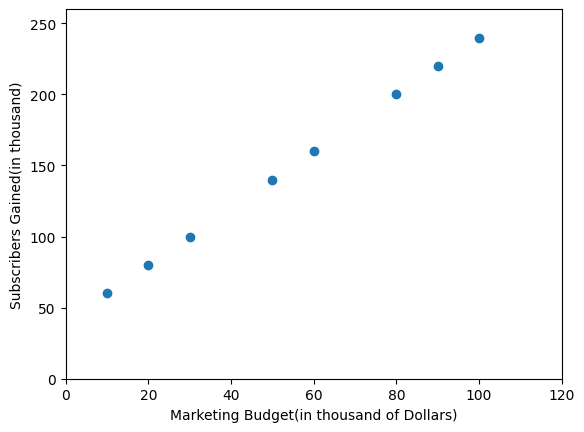

In [4]:
plt.scatter(mar_budget, subs_gained)
plt.xlim(0,120)
plt.ylim(0,260)
plt.xlabel('Marketing Budget(in thousand of Dollars)')
plt.ylabel('Subscribers Gained(in thousand)')
plt.show()

## Seperate data for training and testing

In the step given beolw, we will seperate the data into two parts : Training Data(6 pairs), Testing Data(2 pairs).<br>
We will use training data for training our Model, while testing Data for verifying the prediction of our Model.

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mar_budget,subs_gained,random_state=42,
                                               train_size=0.8, test_size=0.2 )

In [6]:
print('Training_features:',X_train)
print('Training_label:' , y_train)
print('\n')
print('Testing_features:', X_test)
print('Testing_labels:',y_test)

Training_features: [ 60.  10. 100.  50.  30.  90.]
Training_label: [160.  60. 240. 140. 100. 220.]


Testing_features: [80. 20.]
Testing_labels: [200.  80.]


## Create the model

Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `layer_0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

- `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing marketing_budget.

- `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing new subscribers gained. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

In [7]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as arguments, specifying the calculation order from the input to the output.

This model has just a single layer, layer_0.

In [8]:
model = tf.keras.Sequential([layer_0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [9]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting `budget_Spent to New Subs Gained`.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in marketing budget values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the `New subs Gained`. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [10]:
trained_model = model.fit(X_train, y_train, epochs=1000, verbose=False)
print("Finished training the model")

2022-12-26 13:12:57.404262: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Finished training the model


## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch.A high loss means that the value of `new subs gained` the model predicts, are far from the corresponding value of `actual subs gained`.

We'll again use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

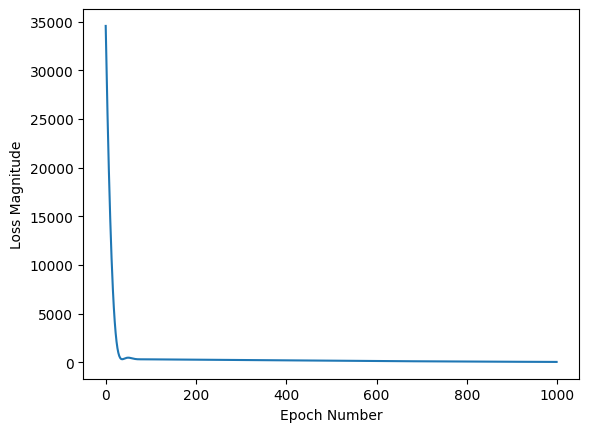

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(trained_model.history['loss'])
plt.show()

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `marketing_Budget` and `new_subs_gained`. You can use the predict method to have it calculate the new_subs_gained for a previously known/unknown marketing_budget.

So, for example, if the marketing_budget value is 80 thousand dollars, what do you think the new_subs_gained result will be? Take a guess before you run this code or refer to your train_data.

In [12]:
print(model.predict([80.0]))

1/1 [==============================] - 0s 42ms/step
[[201.17708]]


The correct answer is $80 \times 2 + 40 = 200$, so our model is doing really well.

In [13]:
# checking for all the test _values
y_pred = model.predict(X_test)
print('Actual Values\tPredicted Values')
print(y_test,'   ',y_pred.reshape(1,-1))

1/1 [==============================] - 0s 12ms/step
Actual Values	Predicted Values
[200.  80.]     [[201.17708  69.67662]]


## Let's check the goodness of fit for model using r2_score(r-squared value)

R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. <br>An R2 of 1 indicates that the regression predictions perfectly fit the data.

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9850058780772896

As we can see our model's r2_score is nearly = 1 that means our model is predicting with a good accuracy

### To review

- We created a model with a Dense layer
- We trained it with 3000 examples (6 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct new_subs_gained value for any marketing_budget value.<br>
And we verified this using our test Data(Remember, 80 was not part of our training data.)
<br>
We also measured the goodness of prediction for our model using r2_score

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer.

In [15]:
print("These are the layer variables: {}".format(layer_0.get_weights()))

These are the layer variables: [array([[2.1916745]], dtype=float32), array([25.843128], dtype=float32)]


The first variable is close to ~2.0 and the second to ~40. These values (2.0 and 40) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $label = 2.0\times feauture + 40$.

Since the form is the same, the variables should converge on the standard values of 2.0 and 40, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little Thought experiment

Just for fun, what if we create a new model with 3 more Dense layers with different units, which therefore also has more variables?

In [16]:
l_0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l_1 = tf.keras.layers.Dense(units=5)
l_2 = tf.keras.layers.Dense(units=1) 
model = tf.keras.Sequential([l_0, l_1, l_2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(X_train,y_train, epochs=2000,verbose=False)
print('\n Finished training Model')


 Finished training Model


In [17]:
print(model.predict([80]))
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))

1/1 [==============================] - 0s 41ms/step
[[200.00043]]
1/1 [==============================] - 0s 30ms/step
0.9999999999723109


### As we can see the r2_score increased thus goodness of fit or prediction of our Model also increased by adding more layers

In [18]:
## TODO: print the wieght of each layer and think why are they so different from (2,40). 